In [ ]:
# Library yang akan dipakai
import zipfile
import os
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, AveragePooling2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Dropout, Flatten

# Untuk load data
from imutils import paths
from PIL import Image
import argparse
import matplotlib.pyplot as plt # untuk menampilkan contoh gambar/data dalam gambar

# Untuk Data Loading -> yang membagi data
from sklearn.preprocessing import LabelBinarizer # Untuk binarisasi label
from sklearn.model_selection import train_test_split # Untuk ngesplit data train & test
from sklearn.metrics import classification_report # Untuk performance measurement, untuk menghasilkan confusion matriks

In [ ]:
# Import data from GDrive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!cd "/content/gdrive/MyDrive/Colab Notebooks/FGA/ML to DL Image Classification/3scenes"

In [ ]:
# Check Data Labels
!ls "/content/gdrive/MyDrive/Colab Notebooks/FGA/ML to DL Image Classification/3scenes"

coast  forest  highway


In [ ]:
# construct the argument parser and parse the arguments
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("/content/gdrive/MyDrive/Colab Notebooks/FGA/ML to DL Image Classification/3scenes")
data = []
labels = []

[INFO] loading images...


In [ ]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 32x32 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
	image = np.array(image.resize((32, 32))) / 255.0
	data.append(image)
	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	# label = imagePath.title
	labels.append(label)
	# print(label)

In [ ]:
# encode the labels, converting them from strings to integers
print(label)

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
# lb.classes_
lb.classes_

highway


array(['coast', 'forest', 'highway'], dtype='<U7')

In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),
	np.array(labels), test_size=0.25)

[[1 0 0]
 [0 1 0]
 [0 1 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 1 0]]


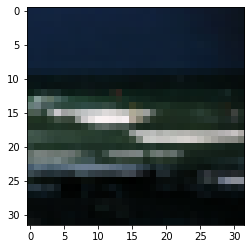

In [ ]:
tes_data = testX[90]
plt.imshow(tes_data)
print(trainY)

In [ ]:
# define our Convolutional Neural Network architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
average_pooling2d (AveragePo (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
average_pooling2d_1 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 32)          9

In [ ]:
model.compile(loss="categorical_crossentropy", 
              optimizer=tf.optimizers.Adam(learning_rate=1e-3, decay=1e-3 / 50),
              metrics=["accuracy"])
model.fit(trainX, trainY, validation_data=(testX, testY),validation_steps=5,epochs=50, batch_size=32)

Epoch 1/50
23/23 [==============================] - 2s 77ms/step - loss: 0.7633 - accuracy: 0.7032 - val_loss: 1.0507 - val_accuracy: 0.6187
Epoch 2/50
23/23 [==============================] - 1s 64ms/step - loss: 0.3954 - accuracy: 0.8425 - val_loss: 1.0531 - val_accuracy: 0.3750
Epoch 3/50
23/23 [==============================] - 2s 68ms/step - loss: 0.3040 - accuracy: 0.8706 - val_loss: 1.0542 - val_accuracy: 0.3750
Epoch 4/50
23/23 [==============================] - 1s 64ms/step - loss: 0.2166 - accuracy: 0.9339 - val_loss: 1.0704 - val_accuracy: 0.3750
Epoch 5/50
23/23 [==============================] - 1s 63ms/step - loss: 0.2085 - accuracy: 0.9170 - val_loss: 1.1110 - val_accuracy: 0.3750
Epoch 6/50
23/23 [==============================] - 1s 64ms/step - loss: 0.1601 - accuracy: 0.9451 - val_loss: 1.0278 - val_accuracy: 0.4375
Epoch 7/50
23/23 [==============================] - 1s 64ms/step - loss: 0.1344 - accuracy: 0.9606 - val_loss: 1.1310 - val_accuracy: 0.3938
Epoch 8/50
23

In [ ]:
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	    predictions.argmax(axis=1), target_names= lb.classes_))

              precision    recall  f1-score   support

       coast       0.94      0.90      0.92        92
      forest       0.92      0.97      0.94        90
     highway       0.87      0.85      0.86        55

    accuracy                           0.92       237
   macro avg       0.91      0.91      0.91       237
weighted avg       0.92      0.92      0.92       237



In [ ]:
model.save("/content/gdrive/MyDrive/Colab Notebooks/FGA/ML to DL Image Classification/cnn_test3class.hdf5")

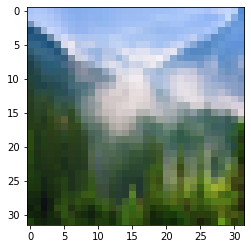

In [ ]:
# imagePaths = paths.list_images("/content/drive/My Drive/Colab Notebooks/forest_test.jpg")
image = Image.open("/content/gdrive/MyDrive/Colab Notebooks/FGA/ML to DL Image Classification/forest_test.jpg")
image = np.array(image.resize((32, 32))) / 255.0
plt.imshow(image)


In [ ]:
model.load_weights("/content/gdrive/MyDrive/Colab Notebooks/FGA/ML to DL Image Classification/cnn_test3class.hdf5")
image2 = np.expand_dims(image, axis=0)
pred = model.predict(image2)
print(pred)
y_classes = pred.argmax(axis=1)
print(y_classes)
print(lb.classes_[y_classes])
# y_classes = keras.np_utils.probas_to_classes(pred)
# print(y_classes)
# print("hasil klasifikasi =",lb.classes_[pred[0]])

[[5.1081686e-05 9.9618620e-01 3.7627683e-03]]
[1]
['forest']
